In [14]:
# Imports
%pylab inline
import pickle
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


/Users/alexbw/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [15]:
# Path to file
data_filename = '/Users/alexbw/Downloads/dataset.pkl'
labels_filename = '/Users/alexbw/Downloads/syllablelabels.pkl'

In [16]:
# Load the dataset
with open(filename, 'rb') as f:
    dataset = pickle.load(f, encoding='latin1') 
    
# Load the syllable labels
with open(labels_filename, 'rb') as f:
    syllable_labels = pickle.load(f, encoding='latin1')
# syllable_labels = analysis.relabel_by_usage(syllable_labels)

# Load the labels into our dataset array
split_points = np.cumsum([len(v['data']) for v in dataset.values()])[:-1]
split_syllable_labels = np.array_split(syllable_labels,split_points)
for mouse_name,_syllable_labels in zip(dataset.keys(),split_syllable_labels):
    dataset[mouse_name]['syllable_labels'] = _syllable_labels

In [17]:
# Test the syllable usages

In [18]:
# Show some raw frames

In [19]:
# Make Figure 1
target_mouse = 'C57-6_methylphenidate_20mgkg_9-10-15'
x = np.arange(21000,24000)
df = [d for k,d in dataset.items() if k == target_mouse][0]

In [20]:
heightfn = lambda df, ind: np.histogram(df['height'][ind], np.linspace(0,90,160))[0]
lengthfn = lambda df, ind: np.histogram(df['length'][ind], np.linspace(0,90,160))[0]
velocityfn = lambda df, ind: np.histogram(np.abs(30.0*df['velocity'][ind]), np.linspace(0,450,160))[0]
positionfn = lambda df, ind: np.histogram(df['dist_to_center'][ind], np.linspace(0,1,160))[0]

(-0.5, 2999.5, 0.5, -0.5)

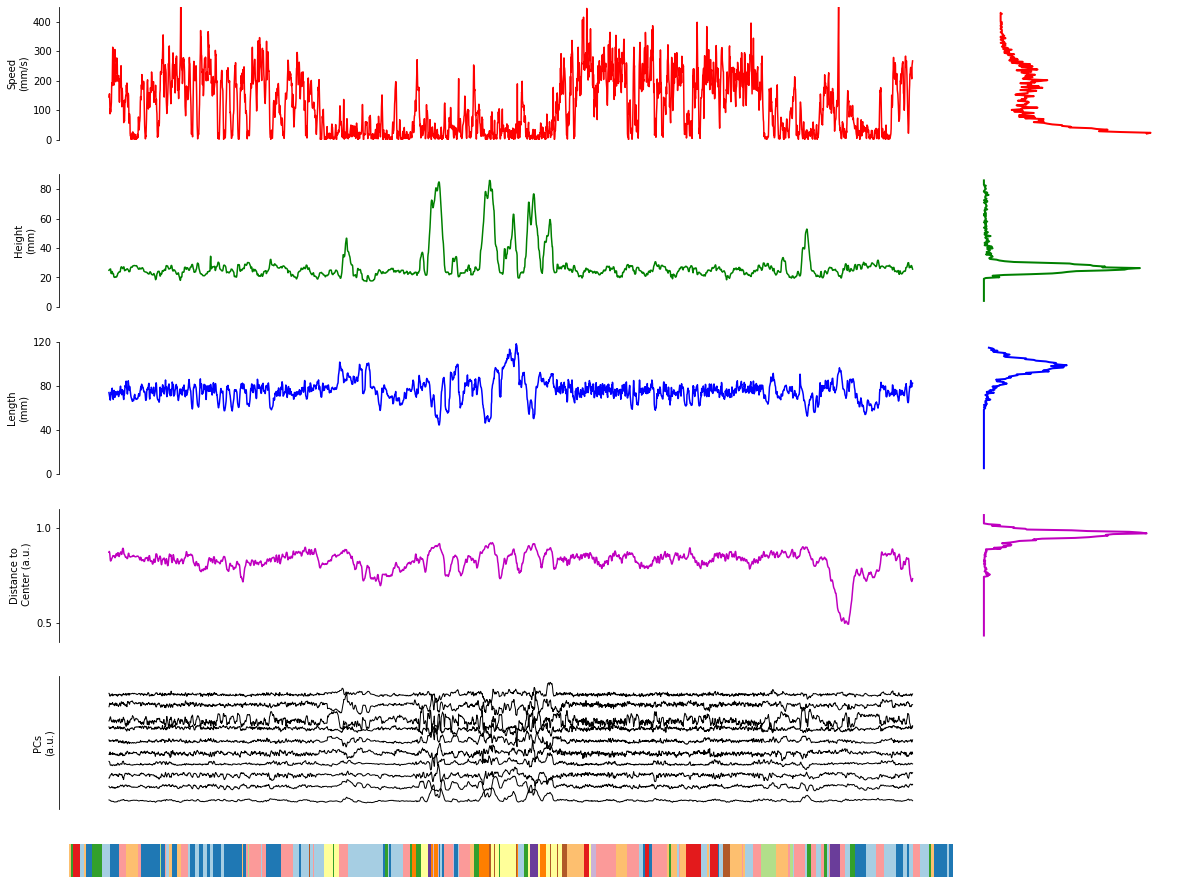

In [21]:
figure(figsize=(20,16))
gs = GridSpec(6,2,width_ratios=[4,1], height_ratios=[1,1,1,1,1,0.25], hspace=0.3, wspace=0.02)

subplot(gs[0,0])
plot(x/30.0,np.abs(30.*df['velocity'][x]), 'r')
ylabel("Speed\n(mm/s)")
yticks([0,100,200,300,400])
xticks([])
axis('tight')
ylim(0,450)


subplot(gs[0,1])
y = velocityfn(df,x).astype('float32')
y /= float(y.sum())
plot(y, range(len(y)), 'r', linewidth=2)
axis('off')
xlim(-0.01,0.05)


subplot(gs[1,0])
plot(x/30.0,df['height'][x], 'g')
sns.despine(offset=10)
xticks([])
ylabel("Height\n(mm)")
yticks([0,20,40,60,80])
axis('tight')
ylim(0,90)

subplot(gs[1,1])
y = heightfn(df,x).astype('float32')
y /= float(y.sum())
plot(y, range(len(y)), 'g', linewidth=2)
axis('off')
xlim(-0.01,0.1)


subplot(gs[2,0])
plot(x/30.0,df['length'][x], 'b')
sns.despine(offset=10)
ylabel("Length\n(mm)")
yticks([0,40,80,120])
axis('tight')
xticks([])
ylim(0,120)

subplot(gs[2,1])
y = lengthfn(df,x).astype('float32')
y /= float(y.sum())
plot(y, range(len(y)), 'b', linewidth=2)
xticks([])
axis('off')
xlim(-0.01,0.1)

subplot(gs[3,0])
plot(x/30.0,df['dist_to_center'][x], 'm')
sns.despine(offset=10)
ylabel("Distance to\n Center (a.u.)")
axis('tight')
xticks([])
yticks([0.5, 1.0])
ylim(0.4,1.1)

subplot(gs[3,1])
y = positionfn(df,x).astype('float32')
y /= float(y.sum())
plot(y, range(len(y)), 'm', linewidth=2)
axis('tight')
axis('off')
xlim(-0.01,0.1)


subplot(gs[4,0])
scale = 3
for i in range(10):
    y = scale * df['data'][x,i] / df['data'][x,i].max()
    plot(x / 30.0, y + i*scale, 'k', linewidth=1)
sns.despine(offset=10, bottom=True)
ylabel("PCs\n(a.u.)")
axis('tight')
yticks([])
xticks([])

subplot(gs[5,0])
imshow(df['syllable_labels'][None,x], interpolation='none', cmap='Paired')
axis('tight')
axis('off')